<a href="https://colab.research.google.com/github/abol-hasan/Image_classification_Opencv_ML/blob/main/Image_clssification_openCV_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [21]:
# Reading image through cv2
image = cv2.imread('/content/drive/MyDrive/jolie/jolie1.jpg')
image.shape

(168, 300, 3)

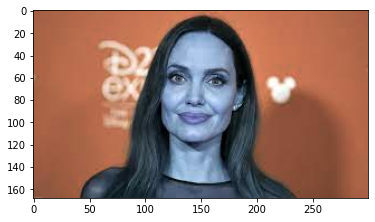

In [22]:
plt.imshow(image)

(168, 300)


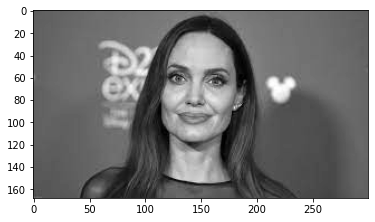

In [23]:
#changing to gray
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
plt.imshow(image_gray, cmap='gray')

# **Using Opencv for detecting face by CascadeClassifier**

In [24]:

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)
faces

array([[103,  28,  88,  88]], dtype=int32)

In [25]:
(x,y,w,h) = faces[0]

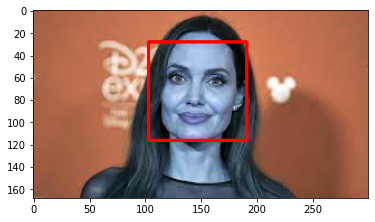

In [26]:
startpoint = (x,y)
endpoint = (x+w, y+h)
thickness = 2
face_image = cv2.rectangle(image,startpoint,endpoint,(255,0,0),thickness)
plt.imshow(face_image)

# **Define  function for getting original image and returning only the faces**

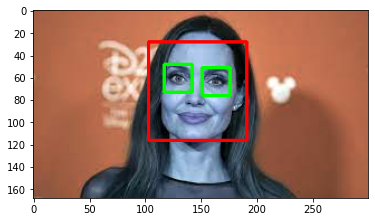

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = image_gray[y:y+h, x:x+w]
    roi_color = face_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_image, cmap='gray')
plt.show()

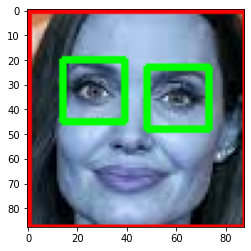

In [28]:
plt.imshow(roi_color)

In [29]:
def create_only_faces(image_path):

  image = cv2.imread(image_path)
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)
  for (x,y,w,h) in faces:
     roi_gray = image_gray[y:y+h, x:x+w]
     roi_color = image[y:y+h, x:x+w]
     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
        if len(eyes) >=2:
         return roi_color
      

In [31]:
sliced_image = create_only_faces('/content/drive/MyDrive/jolie/jolie2.jpg')
sliced_image

In [32]:
def create_only_faces_otherversion(image_path):

  image = cv2.imread(image_path)
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(image_gray, 1.3, 5)
  for (x,y,w,h) in faces:
    if (x,y,w,h) ==():
     break
    roi_gray = image_gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
     
    return roi_color

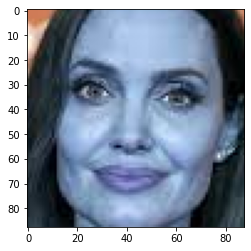

In [33]:
sliced_image_0 = create_only_faces_otherversion('/content/drive/MyDrive/jolie/jolie1.jpg')
plt.imshow(sliced_image_0)

**Going through directory and subdirectories for getting images and creating faces and save them in a new directory the the new suffix**

In [17]:
# make directory for saving new images 
from pathlib import Path
Path("drive/MyDrive/cropped_images").mkdir(parents=True, exist_ok=True)

In [18]:
# Going in directory and make a list of subdirectory
import os
people_dir = []
for roots, _, _ in os.walk('/content/drive/MyDrive/Picture_of_famous_people'):
  people_dir.append(roots)

people_dir = people_dir[1:]

In [19]:
# Getting the name of each person and making a list of them
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Picture_of_famous_people')
people_name = np.array([x.name for x in data_dir.glob('*')])

In [20]:
# Making a path for images befor cleaning manually
Path("drive/MyDrive/cropped_images_1_not_manual").mkdir(parents=True, exist_ok=True)

In [ ]:
# Going through directories and getting faces by pathlib library 
path_folder = '/content/drive/MyDrive/cropped_images_1_not_manual'
p = Path('/content/drive/MyDrive/Picture_of_famous_people')

changed_image_dirs = []
player_file_names_dict = {}
for i,child in enumerate(p.iterdir()): # going through the path and get the subdirectory and the name player correspond to it
  player_name = people_name[i]
  player_file_names_dict[player_name] = []
  print(child)
  print(player_name)
  count = 1
  for child_1 in child.iterdir(): # Going through each subdirectories and getting the images with suffix  .jpg
    #print(str(child_1))
    roi_color = create_only_faces(str(child_1)) # Applying fuction an images in order to getting only faces
    
    if roi_color is not None: # Maybe some images do not return faces because of uncleaning data 
      changed_image_folder = path_folder + '/' + player_name # making a path with the name of player
      if not Path(changed_image_folder).exists(): # 
        Path(changed_image_folder).mkdir(parents=True, exist_ok=True)
        changed_image_dirs.append(changed_image_folder)
        print('changed_image_folder is created',changed_image_folder)
      
      changed_path_player = player_name  + str(count) +'.png' # making a new path for the last part of image (/Messi/Messi1.png)
      changed_path_file = changed_image_folder + '/' + changed_path_player # making a complete path
      count+=1
      cv2.imwrite(changed_path_file, roi_color) # saving images in given directory
      player_file_names_dict[player_name].append(changed_path_file)
    

/content/drive/MyDrive/Picture_of_famous_people/tom cruise
tom cruise
/content/drive/MyDrive/Picture_of_famous_people/natalie portman
natalie portman
/content/drive/MyDrive/Picture_of_famous_people/cristiano ronaldo
cristiano ronaldo
/content/drive/MyDrive/Picture_of_famous_people/margot robbie
margot robbie
/content/drive/MyDrive/Picture_of_famous_people/Messi
Messi


In [ ]:
# Doing the prcess for another fuction with the same returning
Path("drive/MyDrive/cropped_images_2").mkdir(parents=True, exist_ok=True)
path_folder = '/content/drive/MyDrive/cropped_images_2'
p = Path('/content/drive/MyDrive/Picture_of_famous_people')

changed_image_dirs_2_other_func = []
player_file_names_dict_2_other_func = {}
for i,child in enumerate(p.iterdir()):
  player_name = people_name[i]
  player_file_names_dict_2_other_func[player_name] = []
  print(child)
  print(player_name)
  count = 1
  for child_1 in child.iterdir():
    #print(str(child_1))
    roi_color = create_only_faces_otherversion(str(child_1))
    
    if roi_color is not None:
      changed_image_folder = path_folder + '/' + player_name
      if not Path(changed_image_folder).exists():
        Path(changed_image_folder).mkdir(parents=True, exist_ok=True)
        changed_image_dirs_2_other_func.append(changed_image_folder)
        print('changed_image_folder is created',changed_image_folder)
      
      changed_path_player = player_name  + str(count) +'.png'
      changed_path_file = changed_image_folder + '/' + changed_path_player
      count+=1
      cv2.imwrite(changed_path_file, roi_color)
      player_file_names_dict_2_other_func[player_name].append(changed_path_file)

/content/drive/MyDrive/Picture_of_famous_people/tom cruise
tom cruise
/content/drive/MyDrive/Picture_of_famous_people/natalie portman
natalie portman
/content/drive/MyDrive/Picture_of_famous_people/cristiano ronaldo
cristiano ronaldo
changed_image_folder is created /content/drive/MyDrive/cropped_images_2/cristiano ronaldo
/content/drive/MyDrive/Picture_of_famous_people/margot robbie
margot robbie
changed_image_folder is created /content/drive/MyDrive/cropped_images_2/margot robbie
/content/drive/MyDrive/Picture_of_famous_people/Messi
Messi
changed_image_folder is created /content/drive/MyDrive/cropped_images_2/Messi


In [34]:
# getting code from stackoverflow
# Getting new form of images by wavelet
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

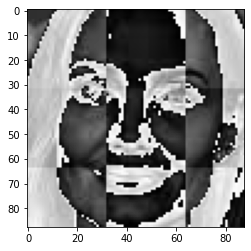

In [35]:
im_har = w2d(sliced_image_0,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
im_har.shape

(88, 88)

In [22]:
# Making labels as number for each player
labels = {}
for i, name in enumerate(people_name):
 labels[name] = i
 

In [23]:
# After saving the croped images in a new folder, we go through them a clean them manually, as a result we have to modify 
# our dictionary for images in it
p = Path('/content/drive/MyDrive/cropped_images_1')

player_file_names_dict_modified = {}
for i,child in enumerate(p.iterdir()):
  print(child)

  player_name = people_name[i]
  print(player_name)
  player_file_names_dict_modified[player_name] = []
  
  for child_1_1 in child.iterdir():
    player_file_names_dict_modified[player_name].append(str(child_1_1))

/content/drive/MyDrive/cropped_images_1/tom cruise
tom cruise
/content/drive/MyDrive/cropped_images_1/natalie portman
natalie portman
/content/drive/MyDrive/cropped_images_1/cristiano ronaldo
cristiano ronaldo
/content/drive/MyDrive/cropped_images_1/margot robbie
margot robbie
/content/drive/MyDrive/cropped_images_1/Messi
Messi


In [24]:
# Going in dictionary and make all images have the same size and add the original image and wavelet images together
# and after that prepare a dataset with its labels(target)
X = []
Y = []
for name_player, image_player in player_file_names_dict_modified.items():
 
  for IMG in image_player:
    img = cv2.imread(IMG)
    resize_orginal_img = cv2.resize(img,(32, 32))
    im_har_N = w2d(img,'db1',5)
    resize_wavelet_img = cv2.resize(im_har_N,(32,32))
    complete_image = np.vstack((resize_orginal_img.reshape(32*32*3,1), resize_wavelet_img.reshape(32*32,1)))
    X.append(complete_image)
    Y.append(labels[name_player])
    

In [25]:
# making dataset ready for training
X = np.array(X).reshape(len(X),len(X[0])).astype(float)
X.shape

(225, 4096)

**Impoting the necessary function and build a model and train it**

In [26]:
from sklearn import datasets,svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [31]:
# split to trainset and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [32]:
# choose a model and train by it
clf = svm.SVC(C=10, kernel='rbf', gamma='auto')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.3508771929824561

In [33]:
clf = svm.SVC(C=10, kernel='rbf', gamma='scale')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6491228070175439

In [34]:
# making a pipeline 
pipe = Pipeline([('standardscaler', StandardScaler()), ('svm', svm.SVC(C=10, kernel='rbf', gamma='auto'))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.6842105263157895

In [35]:
# Getting accuracy
y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred ,target_names=people_name))

                   precision    recall  f1-score   support

       tom cruise       0.43      0.50      0.46         6
  natalie portman       0.62      0.53      0.57        15
cristiano ronaldo       0.57      0.57      0.57         7
    margot robbie       0.76      0.89      0.82        18
            Messi       0.89      0.73      0.80        11

         accuracy                           0.68        57
        macro avg       0.65      0.64      0.64        57
     weighted avg       0.69      0.68      0.68        57



**# Choosing different maodel with different Hyperparameters for finding the best model**

In [36]:
# Creating a dictionary for severals models with different Hypermeters
different_model_with_different_param = { 'svm':{'model':svm.SVC(gamma='auto') ,'param':{'svc__kernel':['rbf', 'linear'], 'svc__C':[1.0, 10.0, 20.0]}}, 
                                       
      
                  'LogisticRegression':{'model': LogisticRegression(),
                                                 
                  'param':{'logisticregression__C':[1.0,10.0,20.0],'logisticregression__solver':['newton-cg',  'liblinear'] }},

                  'RandomForestClassifier':{'model':RandomForestClassifier(),
                                                    'param':{'randomforestclassifier__n_estimators':[10,20,100]}}
    
                                       }

In [37]:
from sklearn.pipeline import make_pipeline
# Getting keys and values from dictionary and apply Standardscaler on data by chaining them to model by make_pipeline
# Through Gridsearchcv , we get different Haperpatameters in models and define cross_validation of 5 for train and test set
result_of_GS = {}
rS_Best = [] # A list in which there is a dictionary with the name of model , best score and best parameters 
best_param_each_model = {} # Getting best model with best parameters
for est, mp in different_model_with_different_param.items():
  
  pipe = make_pipeline(StandardScaler(), mp['model'])
  clf=GridSearchCV(pipe, mp['param'], cv=5)
  clf.fit(x_train,y_train) # fit it to data
  rS_Best.append({
        'model': est,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
  best_param_each_model[est] = clf.best_estimator_ 
  result_of_GS[est] = clf.cv_results_

In [45]:
import pandas as pd
df_logReg = pd.DataFrame(result_of_GS['LogisticRegression'], columns=['param_logisticregression__C', 'param_logisticregression__solver', 'mean_test_score'])
df_RanForest = pd.DataFrame(result_of_GS['RandomForestClassifier'], columns=['params', 'mean_test_score'])
df_SVc = pd.DataFrame(result_of_GS['svm'], columns=['param_svc__C', 'param_svc__kernel', 'mean_test_score'])
df_result_best = pd.DataFrame(rS_Best)

In [46]:
df_result_best

,model,best_score,best_params
0,svm,0.749733,"{'svc__C': 1.0, 'svc__kernel': 'linear'}"
1,LogisticRegression,0.755793,"{'logisticregression__C': 10.0, 'logisticregre..."
2,RandomForestClassifier,0.643316,{'randomforestclassifier__n_estimators': 100}


In [47]:
df_logReg

,param_logisticregression__C,param_logisticregression__solver,mean_test_score
0,1,newton-cg,0.749911
1,1,liblinear,0.743672
2,10,newton-cg,0.755793
3,10,liblinear,0.743672
4,20,newton-cg,0.755793
5,20,liblinear,0.743672


In [48]:
df_RanForest

,params,mean_test_score
0,{'randomforestclassifier__n_estimators': 10},0.530303
1,{'randomforestclassifier__n_estimators': 20},0.577897
2,{'randomforestclassifier__n_estimators': 100},0.643316


In [49]:
df_SVc

,param_svc__C,param_svc__kernel,mean_test_score
0,1,rbf,0.648841
1,1,linear,0.749733
2,10,rbf,0.696257
3,10,linear,0.749733
4,20,rbf,0.696257
5,20,linear,0.749733


In [50]:
svc_score = best_param_each_model['svm'].score(x_test, y_test)
svc_score

0.7192982456140351

In [51]:
log_score = best_param_each_model['LogisticRegression'].score(x_test, y_test)
log_score

0.7719298245614035

In [52]:
log_score = best_param_each_model['RandomForestClassifier'].score(x_test, y_test)
log_score

0.6666666666666666

In [38]:
from sklearn.metrics import confusion_matrix
y_pred_1 = best_param_each_model['svm'].predict(x_test) 
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[ 5,  0,  1,  0,  0],
       [ 3,  8,  1,  3,  0],
       [ 1,  1,  3,  0,  2],
       [ 1,  2,  0, 15,  0],
       [ 0,  0,  1,  0, 10]])

([<matplotlib.axis.YTick at 0x7f6b7b5e9bd0>,
 [Text(0, 0.5, 'tom cruise'),
  Text(0, 1.5, 'natalie portman'),
  Text(0, 2.5, 'cristiano ronaldo'),
  Text(0, 3.5, 'margot robbie'),
  Text(0, 4.5, 'Messi')])

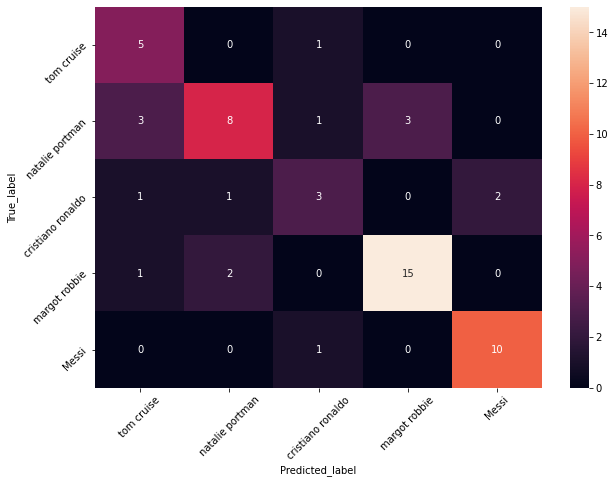

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted_label')
plt.xticks([i + 0.5 for i in range(len(people_name))], people_name, rotation=45)
plt.ylabel('True_label')
plt.yticks([i + 0.5 for i in range(5)], people_name, rotation=45)